In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path to your dataset
dataset_path = 'Nail/Nail_Images/train/'

# Image parameters
img_height, img_width = 128, 128
batch_size = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Check the number of classes
num_classes = len(train_gen.class_indices)
print("Number of classes:", num_classes)


Found 531 images belonging to 17 classes.
Found 126 images belonging to 17 classes.
Number of classes: 17


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


c:\Users\super\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 17)             │         4,369 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,274,193 (23.93 MB)

 Trainable params: 6,274,193 (23.93 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
epochs = 25

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)


Epoch 1/25


c:\Users\super\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 933ms/step - accuracy: 0.0596 - loss: 2.8368 - val_accuracy: 0.0952 - val_loss: 2.8054
Epoch 2/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 955ms/step - accuracy: 0.1040 - loss: 2.7984 - val_accuracy: 0.0952 - val_loss: 2.7919
Epoch 3/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 863ms/step - accuracy: 0.1126 - loss: 2.7924 - val_accuracy: 0.0952 - val_loss: 2.7857
Epoch 4/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 925ms/step - accuracy: 0.0774 - loss: 2.8041 - val_accuracy: 0.1270 - val_loss: 2.7772
Epoch 5/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 912ms/step - accuracy: 0.0722 - loss: 2.7898 - val_accuracy: 0.1190 - val_loss: 2.7432
Epoch 6/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 893ms/step - accuracy: 0.1194 - loss: 2.7452 - val_accuracy: 0.1508 - val_loss: 2.7275
Epoch 7/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 915ms/step - accuracy: 0.1123 - loss: 2.7348 - val_accuracy: 0.1270 - val_loss: 2.7085
Epoch 8/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 908ms/step - accuracy: 0.1002 - loss: 2.7090 - val_accuracy: 0.119

In [12]:
val_loss, val_accuracy = model.evaluate(val_gen)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# If accuracy is lower than 90%, you might need to fine-tune the model
if val_accuracy < 0.90:
    print("Consider fine-tuning the model for better accuracy.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - accuracy: 0.0934 - loss: 2.6769
Validation Accuracy: 11.11%
Consider fine-tuning the model for better accuracy.


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 370ms/step


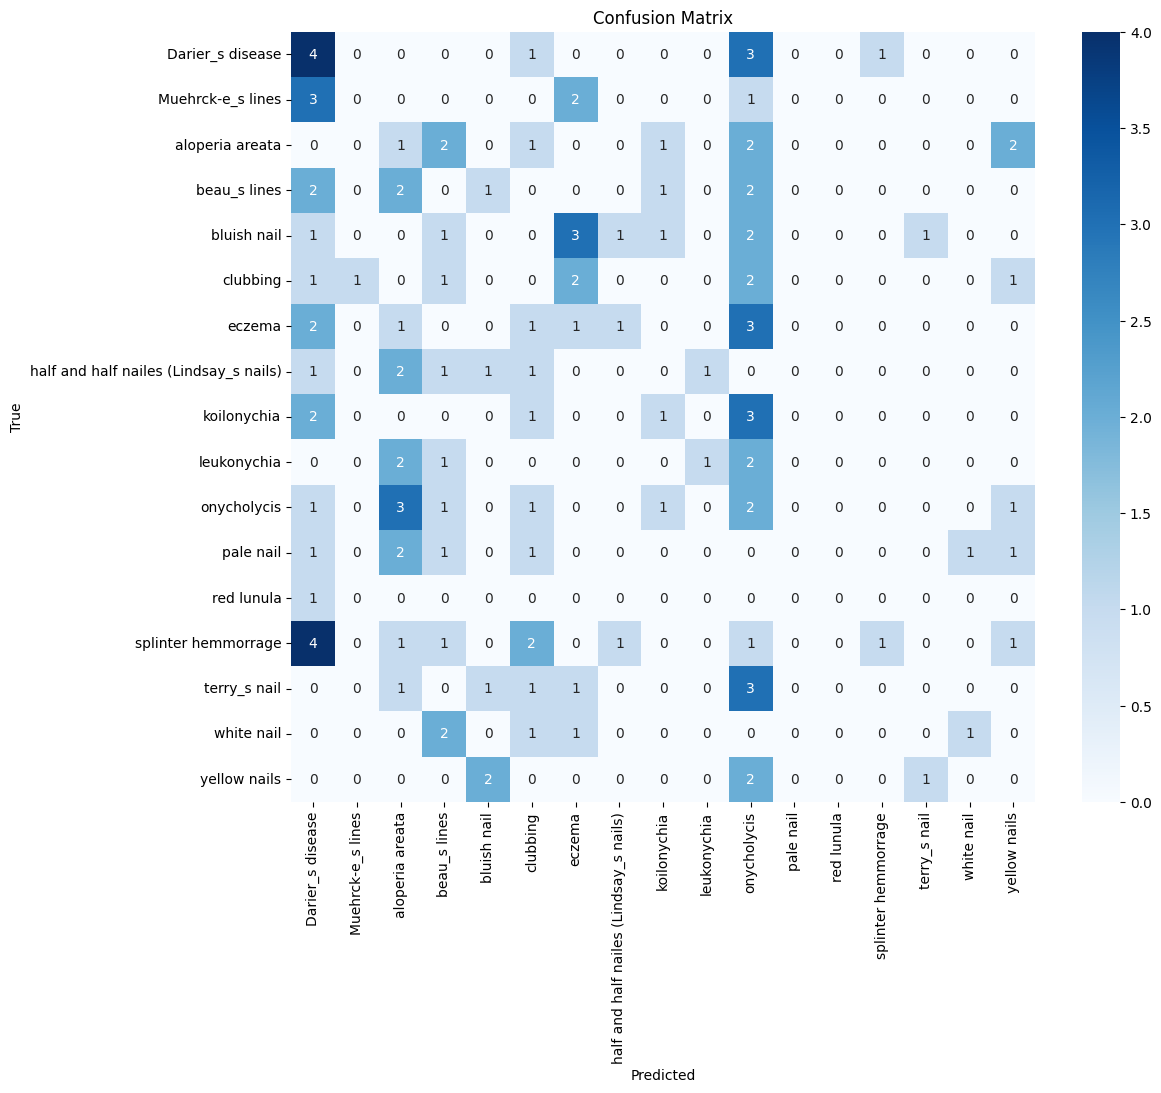

In [13]:
# Get the ground truth labels and predictions
Y_val = val_gen.classes
Y_pred = model.predict(val_gen)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(Y_val, Y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_gen.class_indices.keys(), yticklabels=train_gen.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
model.save('nail_disease_classifier.keras')